<center><h1>Flood Prediction Model</h1></center>

##### 2018 was a disastrous year on india specified in kerala, a low in the Arabian Sea caused high convection over Kerala, which led to the excessive rains.

# The Task
##### Our task today about using the Kerala flood dataset to predict the likelihood of flooding in the state of Kerala.

# A Reminder of What we Know 
##### 📌 What is predictive model?
    📣 It is a method used to determine the output using historical data
##### 📌 What is model mean?
    📣 Equation   
##### 📌 Application of predictive models:
    📣 Fraud detection
    📣 Speech recognition
    📣 Sales forecasting
##### 📌 Examples "predictive models"?
    📣 Naive Bayes
    📣 Neural Network
    📣 Decision Tree

##### 📌 K-Fold Cross Validation
<br>

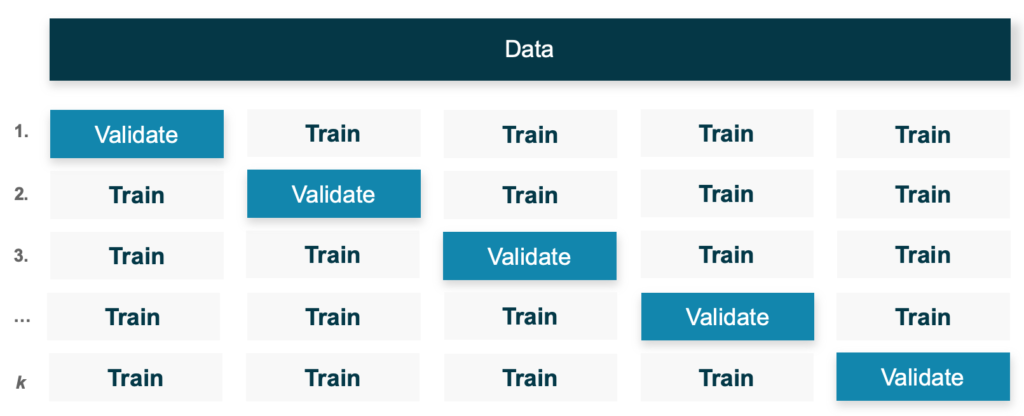

# Models to Use
    🌳 DTR : Decision Tree Regressor
    📏 Logistic Regression
    📏 Linear Regression

# Why we use regression?
    💉 We use the regression to predict continuous data as price, age, salary.
    💉 Used to identify the associations between variables occurring in some data.

# dependencies
    📦 pandas : pip install pandas
    📦 numpy : pip install numpy
    📦 sklearn : pip install sklearn
    📦 seaborn : pip install seaborn
    📦 dataprep : pip install -U dataprep

<br>

# Questions?

    ❓ In which year was the rainfall at the highest level?
    ❓ Show the average of annual rainfall between 1901-1999 and 2000-2018?
    ❓ What is the average annual rainfall?
    ❓ What is the month with the highest amount of rain that repeated over the years?
    ❓ What is the month with the lowest amount of rain that repeated over the years?
    ❓ What is the percentage of annual rainfall?
    ❓ What is the distribution of the annual rainfall?
    ❓ What is the percentage of annual rainfall between 2010 and 2018?
<br>

# importing libraries

In [1]:
  # Work with data
import pandas as pd
import numpy as np
  # modify headers
from dataprep.clean import clean_headers
  # splitting the data using the cross-validation --> Training set & Validation set
from sklearn.model_selection import KFold
  # Models to use 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
  # performance of the model
from sklearn.metrics import mean_squared_error as MSE  # the lower the value the better model
  # to find the RMSE --> Root Mean Squared Error
from numpy import sqrt
  # Visualization the result
import seaborn as sea
import matplotlib.pyplot as plt
  # to use counter class
from collections import Counter

# Global seed so that our work is reproducible

In [2]:
np.random.seed(1)

# reading the dataset

In [3]:
# to read the dataset we use the method of pandas read_csv that help us to read csv files 
df = pd.read_csv("kerala.csv")

In [4]:
# show the data 
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


# Understand our data

In [5]:
# shape of thed ata
"The sahpe of the data is " + str(df.shape)  # 118 rows, 16 columns

'The sahpe of the data is (118, 16)'

In [6]:
# some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

<br>

### What I understood about the dataset?

###### From what we see from the info above:
###### 📍 There are no null values
###### 📍 We have object column "SUBDIVISION"
###### 📍 We have the object target column FOODS 
###### 📍 We have column "YEAR" with integer values
###### 📍 We have 12 months as a float columns from "JAN" to "DEC"
###### 📍 We have also float column "ANNUAL RAINFALL" that mean => round("the summation of all months value for each year", 1)
###### 📍 in 1901 the annual rainfall was: 28.7+44.7+51.6+160.0+174.7+824.6+743.0+357.5+197.7+266.9+350.8+48.4 = 3248.6000000000004

### Troubles with our dataset

###### 🗑 Working with the names of the columns is not convenient for example df['ANNUAL RAINFALL'] will give us a key error 
###### because there is a single space before ANNUAL --> df[' ANNUAL RAINFALL'], this will work
###### 🗑 The columns' names are in capital letters and this is not comfortable


<br>

# Prepare the data

In [7]:
# Let us modify the names of the columns to snake_case
cp_df = clean_headers(df, report = False)  # report = False to get result without the report...
cp_df

,subdivision,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual_rainfall,floods
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [8]:
# normalize the target column | convert it to 0, 1 instead of YES, NO
cp_df["floods"] = np.where(cp_df['floods'] == "YES", 1, 0)

In [9]:
cp_df.floods.value_counts()

1    60
0    58
Name: floods, dtype: int64

# Answers

### In which year was the rainfall at the highest level?

In [10]:
highest_level_rain = cp_df["year"][cp_df["annual_rainfall"] == cp_df["annual_rainfall"].max()]
print("The highest level of rainfall was in", cp_df["year"].iloc[highest_level_rain.idxmax()], "with", cp_df["annual_rainfall"].max())

The highest level of rainfall was in 2018 with 4473.0


### Show the average of annual rainfall between 1901-1999 and 2000-2018?

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Average of Annual Rainfall')]

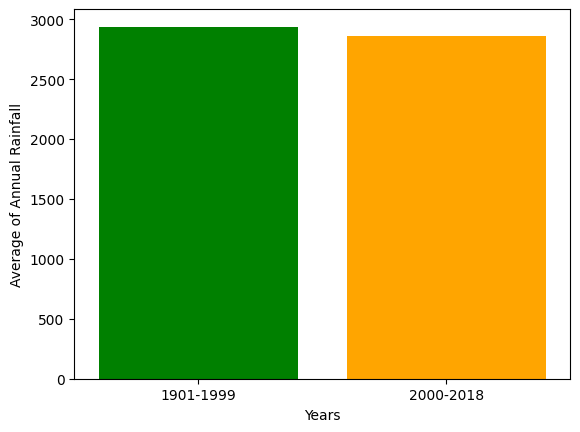

In [11]:
# copy data frame
temp_df = cp_df.copy()
# create a new column
temp_df['norm_year'] = temp_df["year"]
# loop through new column then make some replacements 
for y in range(1901, 2000):
    temp_df["norm_year"].replace(y, 1, inplace=True)
for y in range(2000, 2019):
    temp_df["norm_year"].replace(y, 0, inplace=True)

# unpivot table
d = pd.melt(temp_df, id_vars=["norm_year"], value_vars=['annual_rainfall'])
# categorize the data of variable 
d['variable'] = np.where(d['norm_year'] == 1, '1901-1999', '2000-2018')
# group by y variable and get the mean for value
ss = d.groupby('variable')['value'].mean().to_frame()
# plot the bar plot
ax = sea.barplot(x=ss.index, y=ss.value, palette=['g', 'orange'], saturation=1)
ax.set(xlabel='Years', ylabel='Average of Annual Rainfall')

### What is the average annual rainfall?

In [12]:
print("The average of annual rate =", cp_df['annual_rainfall'].mean().round(2))

The average of annual rate = 2925.41


### What is the month with the highest amount of rain that repeated over the years?

In [13]:
# pd.set_option('display.max_rows', None)  # This will allow to show all rows without ...

gg = cp_df[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]

months_ids = []
for index in range(118):
    months_ids.append(gg.loc[index, 'jan':].idxmax())
 
counter = Counter(months_ids)
counter = sorted(counter.items(), key=lambda a: a[1], reverse=True)
print("The month is %s repeating %i times as the month with the most amount of rainfall" % counter[0])

The month is jul repeating 57 times as the month with the most amount of rainfall


### What is the month with the lowest amount of rain that repeated over the years?

In [14]:
print(counter[-2][0], '&', counter[-1][0])

may & oct


### What is the percentage of annual rainfall between 2010 and 2018?

In [15]:
# I see this is not important but for practice it is good
((cp_df['annual_rainfall'][(cp_df['year'] >= 2010) & (cp_df['year'] <= 2018)]).size / cp_df['annual_rainfall'].size) * 100

7.627118644067797

### What is the distribution of the annual rainfall?

<AxesSubplot: xlabel='annual_rainfall', ylabel='Count'>

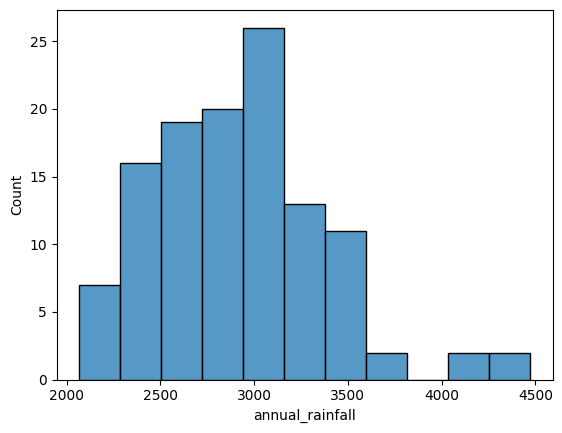

In [16]:
sea.histplot(cp_df['annual_rainfall'])  # this distribution for the annual rainfall column good, so it is good to use it for training the model

# prepare the data for the model

In [17]:
X = cp_df.drop(columns=['floods', 'subdivision'])

In [18]:
X.head(0)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual_rainfall


In [19]:
# Target 
Y = cp_df.floods

In [20]:
# Implementing the cross validation
# training set & validation set
# initialize the KFold 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

In [21]:
splitted_data = list(kf.split(X))
splitted_data

[(array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  47,  49,  50,  51,  52,  53,  55,  57,  58,
          60,  61,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  75,
          76,  77,  79,  81,  83,  84,  85,  86,  87,  88,  89,  91,  92,
          93,  95,  99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 113,
         114, 116, 117]),
  array([  2,  17,  31,  46,  48,  54,  56,  59,  62,  67,  74,  78,  80,
          82,  90,  94,  96,  97,  98, 101, 104, 111, 112, 115])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
          14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  28,
          29,  30,  31,  34,  37,  40,  41,  43,  45,  46,  47,  48,  49,
          50,  51,  52,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,
          65,  67, 

In [22]:
# initialize the models
logistic_regression = LogisticRegression(max_iter=1000) # because the number iter is 100 by default to avoid this warning we change the number of iterations
decision_tree = DecisionTreeRegressor()
linear_regression = LinearRegression()


In [23]:
# Store the result of Root Mean Squared Error
rmse = {
    "RMSE Logistic Regression" : [],
    "RMSE Decision Tree" : [],
    "RMSE Linear Regressione" : []
}


# loop through the data splits
# train_index: all indices that the train data in, test_index: all indices that the test data in
# القيم التي تكون بداخل المصفوفات هي عبارة عن المواقع لكل عنصر تم أخذه أثناء التقسيم
for train_index, test_index in splitted_data:
    # prepare the data
    feature_train, feature_test = X.iloc[train_index, :], X.iloc[test_index, :]
    labels_train, labels_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # train the models
    logistic_regression.fit(feature_train, labels_train)
    decision_tree.fit(feature_train, labels_train)
    linear_regression.fit(feature_train, labels_train)
    
    # predicted values
    predicted_values_log = logistic_regression.predict(feature_test)
    predicted_values_dt = decision_tree.predict(feature_test)    
    predicted_values_lin = linear_regression.predict(feature_test)
    
    # compute the RMSE  ||| for root mean.. we can use the parameter squared = False to compute the rmse or we can use sqrt
    rmse["RMSE Logistic Regression"].append(sqrt(MSE(labels_test, predicted_values_log)))
    rmse["RMSE Decision Tree"].append(sqrt(MSE(labels_test, predicted_values_dt)))
    rmse["RMSE Linear Regressione"].append(sqrt(MSE(labels_test, predicted_values_lin)))
    

In [24]:
# show the result
# rmse
df_rmse = pd.DataFrame(rmse)
df_rmse

,RMSE Logistic Regression,RMSE Decision Tree,RMSE Linear Regressione
0,0.000000,0.204124,0.320008
1,0.204124,0.000000,0.333503
2,0.204124,0.204124,0.354421
3,0.208514,0.208514,0.334899
4,0.294884,0.000000,0.320054


In [25]:
# get the average of each of models
avg_rmse = {
    "RMSE Logistic Regression" : round(np.mean(rmse["RMSE Logistic Regression"]), 2),
    "RMSE Decision Tree" : round(np.mean(rmse["RMSE Decision Tree"]), 2),
    "RMSE Linear Regressione" : round(np.mean(rmse["RMSE Linear Regressione"]), 2)
}


In [26]:
df_avg_rmse = pd.DataFrame(avg_rmse, index=[0])

In [27]:
df_avg_rmse

,RMSE Logistic Regression,RMSE Decision Tree,RMSE Linear Regressione
0,0.18,0.12,0.33


In [28]:
print("The best model is %s with RMSE =" % "RMSE Decision Tree", df_avg_rmse.get("RMSE Decision Tree")[0])       

The best model is RMSE Decision Tree with RMSE = 0.12


# Visualization

<AxesSubplot: >

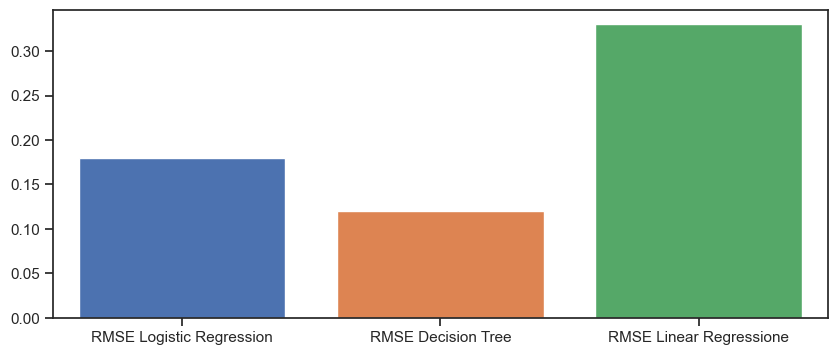

In [29]:
# Show each model with each "AVERAGE RMSE"
# style='ticks' --> to show the ticks and remove the grid background
# to know more about the style --> help(sea.axes_style) --> darkgrid, whitegrid, dark, white, ticks
sea.set_theme(font_scale=1, style='ticks')
plt.figure(figsize=(10, 4))
sea.barplot(df_avg_rmse, saturation=1)

<center> <h1 style=color:gray;>GOOD LUCK</h1> </center>